In [1]:
%config Completer.use_jedi = False

In [2]:
import plotly.express as px
import pandas as pd

In [82]:
df = px.data.gapminder()
df.sample(5)

country continent  year  lifeExp      pop    gdpPercap iso_alpha  \
338   Congo, Rep.    Africa  1962   48.435  1047924  2464.783157       COG   
1674  Yemen, Rep.      Asia  1982   49.113  9657618  1977.557010       YEM   
556        Gambia    Africa  1972   38.308   517101   756.086836       GMB   
389          Cuba  Americas  1977   72.649  9537988  6380.494966       CUB   
345   Congo, Rep.    Africa  1997   52.962  2800947  3484.164376       COG   

      iso_num  
338       178  
1674      887  
556       270  
389       192  
345       178

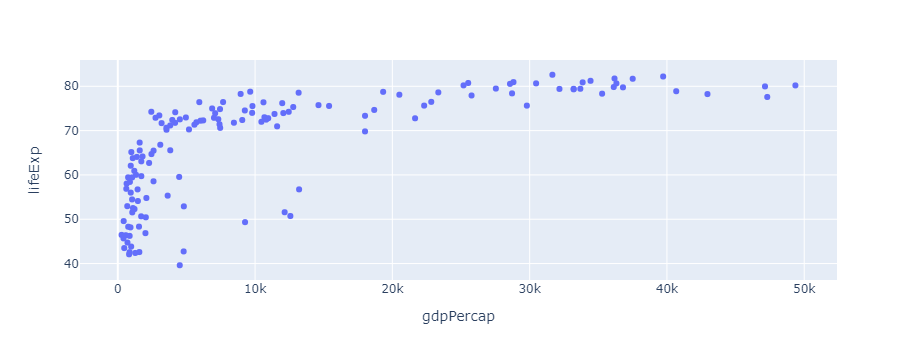

In [7]:
# Make a scatter plot
px.scatter(df[df.year == 2007], x='gdpPercap', y='lifeExp')

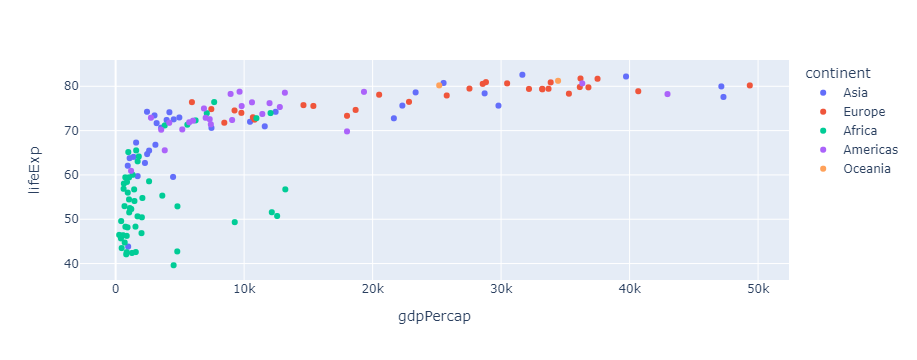

In [12]:
# Specify a color per continent
# click once onto the legend (e.g. Asia) to hide its points
# click twice onto the legend (e.g. Asia) and it will show only its points
px.scatter(df[df.year == 2007], x='gdpPercap', y='lifeExp',
           color='continent')  #<---------- this

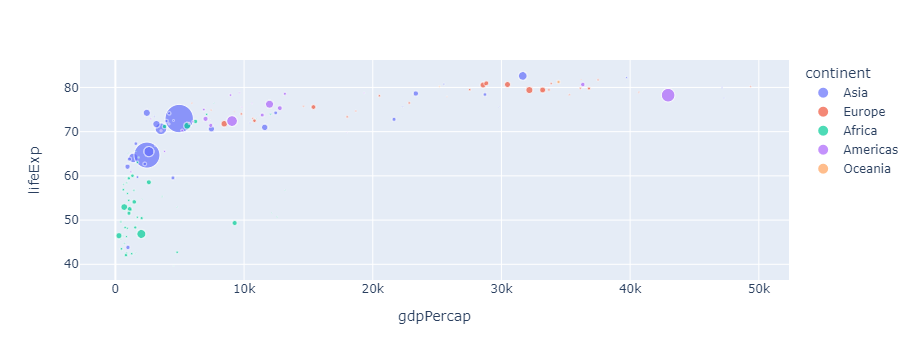

In [9]:
# More interactivity: use size 
px.scatter(df[df.year == 2007], x='gdpPercap', y='lifeExp',
           color='continent', 
           size='pop')  #<---------- this

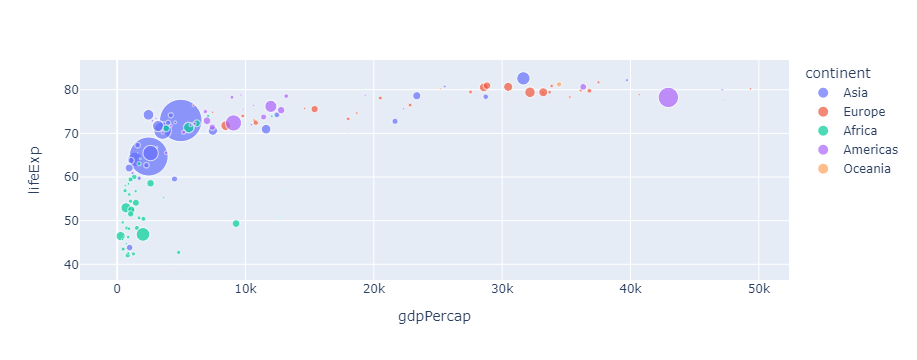

In [16]:
# More interactivity: use size_max default = 20
px.scatter(df[df.year == 2007], x='gdpPercap', y='lifeExp',
           color='continent', size='pop',
          size_max=30) #<---------- this

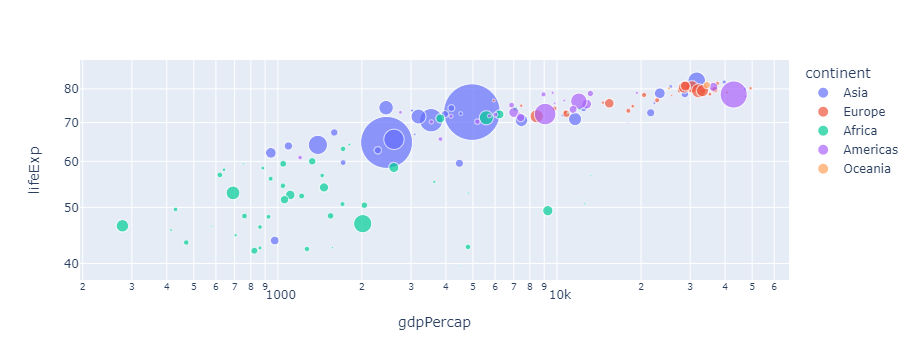

In [19]:
# To rescale your axies, we don't need to compute it into our data
# We can only set log_x or log_y to True 
px.scatter(df[df.year == 2007], x='gdpPercap', y='lifeExp',
           color='continent', size='pop',
           size_max=40,
           log_x=True, log_y=True)#<---------- this

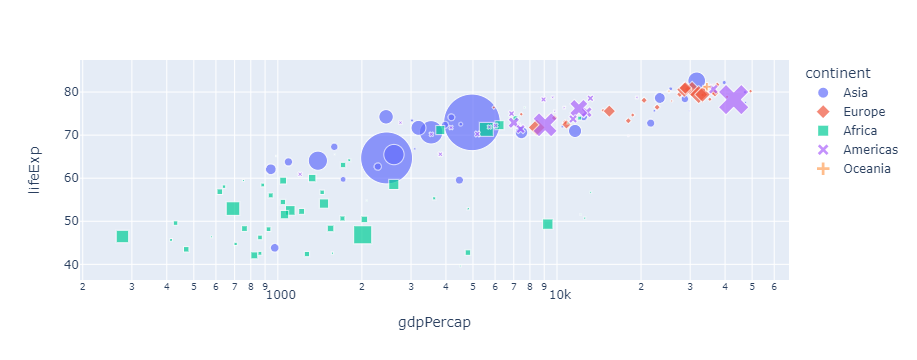

In [80]:
# We can make each continent with a spicific symbol, use symbol='..'
px.scatter(df[df.year == 2007], x='gdpPercap', y='lifeExp',
           color='continent', size='pop',
           size_max=40, log_x=True,
           symbol='continent') #<---------- this

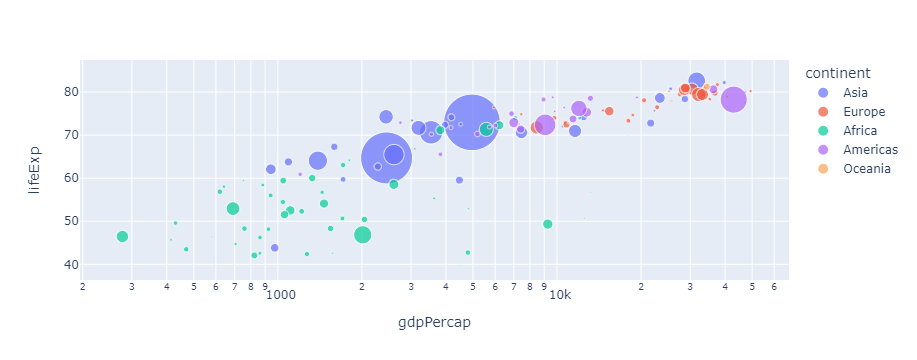

In [79]:
# We can make the hover with a specific name like country to find it
px.scatter(df[df.year == 2007], x='gdpPercap', y='lifeExp',
           color='continent', size='pop',
           size_max=40, log_x=True,
           hover_name='country') #<---------- this

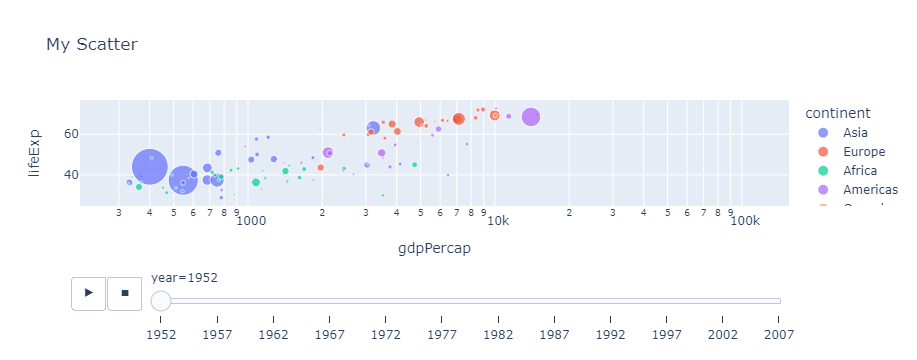

In [77]:
# We can make it animated using (animation_frame)
# note we removed year==2007 condition
px.scatter(df, x='gdpPercap', y='lifeExp',
           color='continent', size='pop',
           size_max=40, log_x=True,
           title="My Scatter",
           hover_name='country',
          animation_frame = 'year') #<---------- this

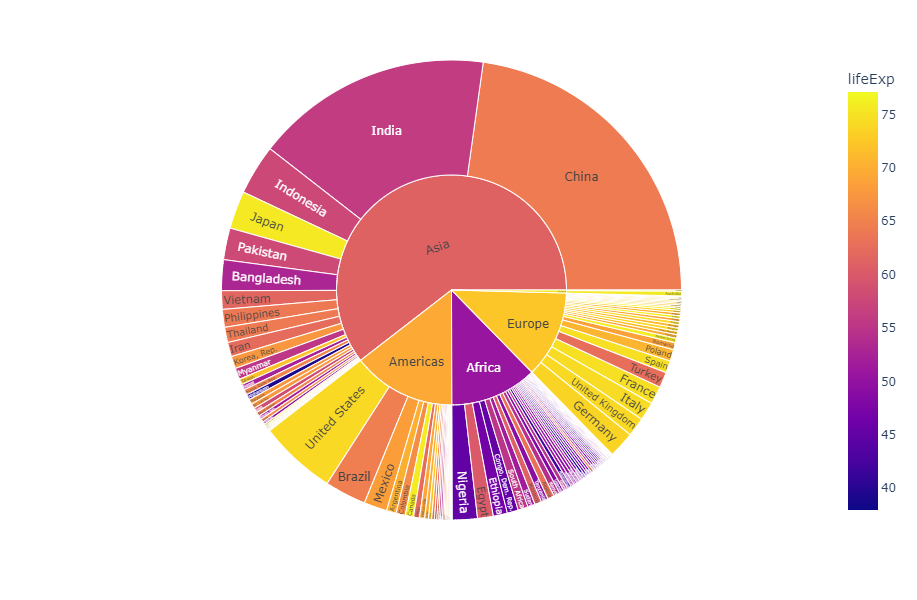

In [84]:
px.sunburst(df, color='lifeExp', values='pop', 
            path= ['continent', 'country'],
           hover_name='country', height=600)

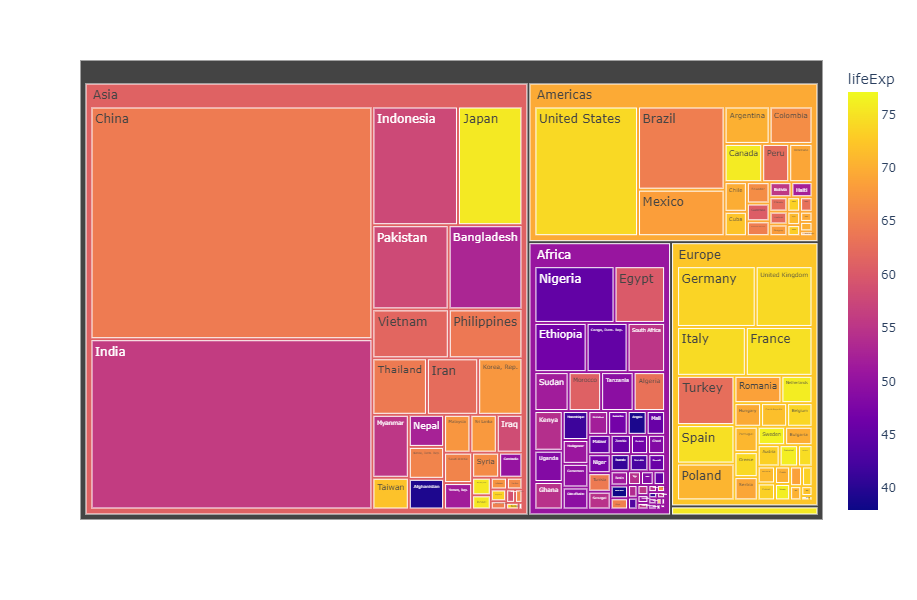

In [85]:
px.treemap(df, color='lifeExp', values='pop', 
            path= ['continent', 'country'],
           hover_name='country', height=600)

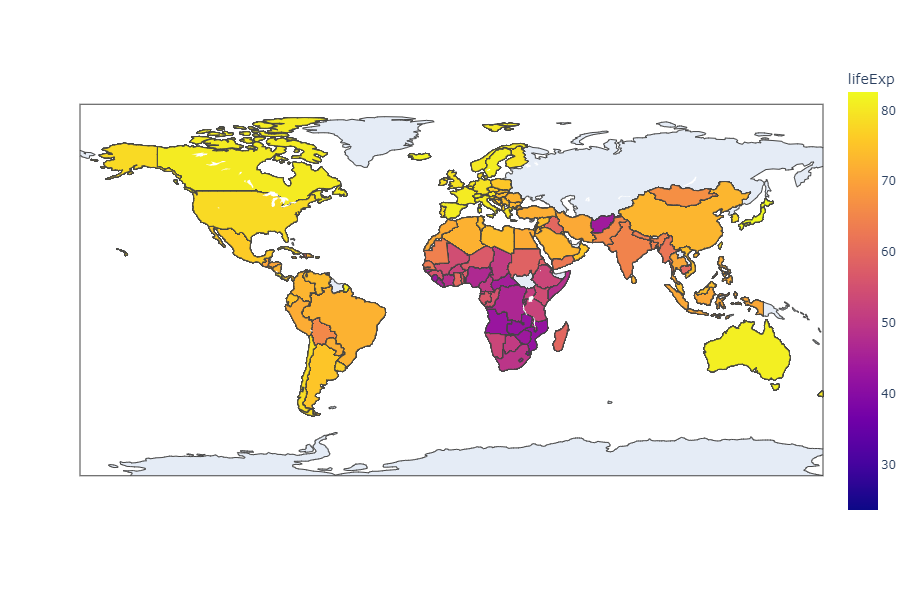

In [88]:
px.choropleth(df, color='lifeExp', locations='iso_alpha', 
            hover_name='country', height=600)

---
**If we want to change our template**

In [37]:
# Display all templates, default: ggplot2
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

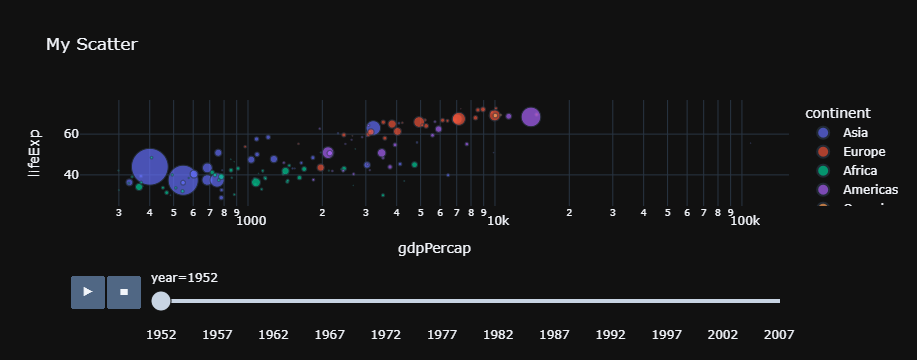

In [40]:
px.scatter(df, x='gdpPercap', y='lifeExp',
           color='continent', size='pop',
           size_max=40, log_x=True,
           title="My Scatter",
          animation_frame = 'year',
          template='plotly_dark') #<---------- this

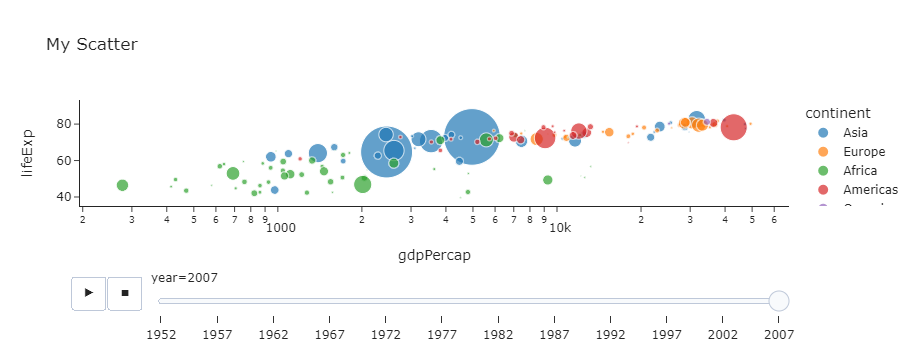

In [41]:
px.scatter(df, x='gdpPercap', y='lifeExp',
           color='continent', size='pop',
           size_max=40, log_x=True,
           title="My Scatter",
          animation_frame = 'year',
          template='simple_white') #<---------- this

---
# Plot a line plot:

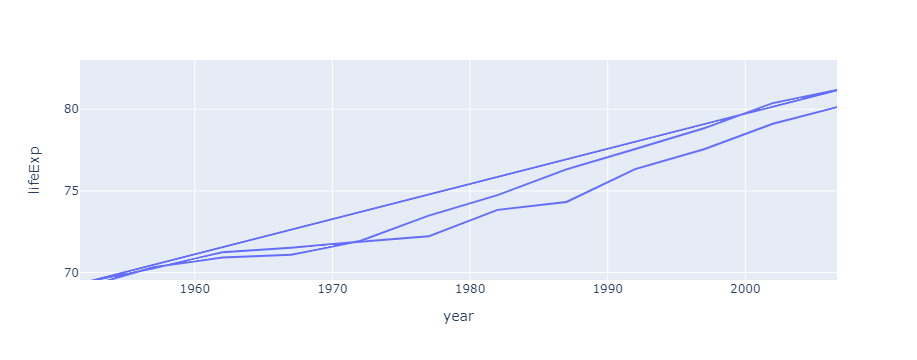

In [44]:
px.line(df[df.continent=='Oceania'], x='year', y='lifeExp')

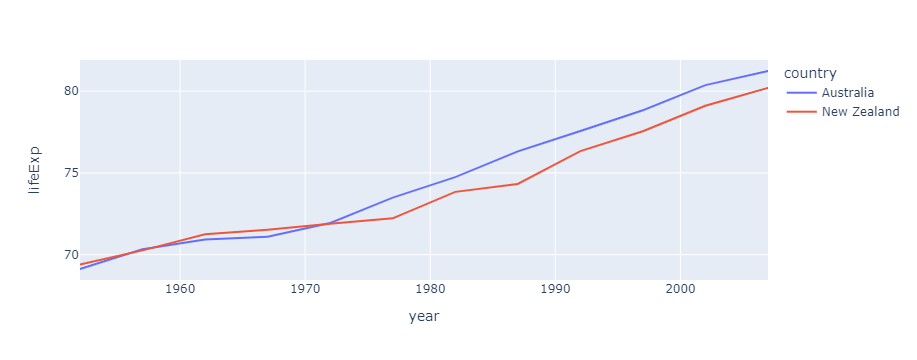

In [45]:
# Note it would be good to sepatate lines for each as a group-by country using color
px.line(df[df.continent=='Oceania'], x='year', y='lifeExp', 
        color='country') #<---------- this

---
# lab: using stocks dataset

In [3]:
df = px.data.stocks()
df.sample(5)

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
66   2019-04-08  1.104915  1.136400  1.499471  0.958523  1.672175  1.371471
101  2019-12-09  1.222821  1.572286  1.432660  1.038855  1.421496  1.752239
104  2019-12-30  1.213014  1.678000  1.503360  1.098475  1.540883  1.788185
6    2018-02-12  0.993259  0.985314  1.178621  0.949211  1.326349  1.043202
90   2019-09-23  1.111465  1.250400  1.403786  0.947819  1.252821  1.561742

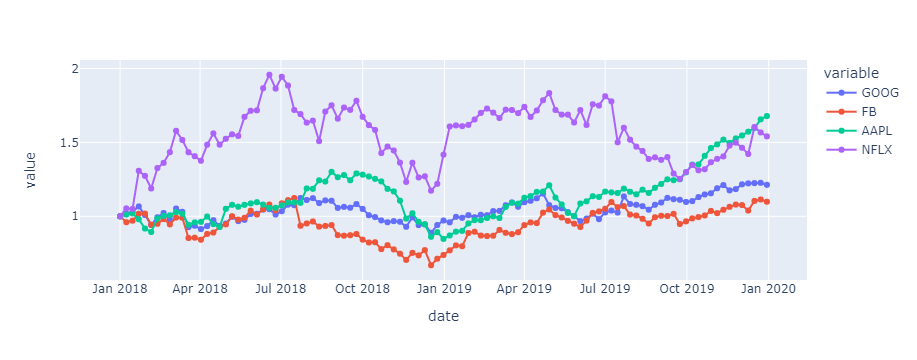

In [7]:
# Sales of google, AAPL and FB over time
px.line(df, x='date', y=['GOOG', 'FB', 'AAPL', 'NFLX'], markers='date')

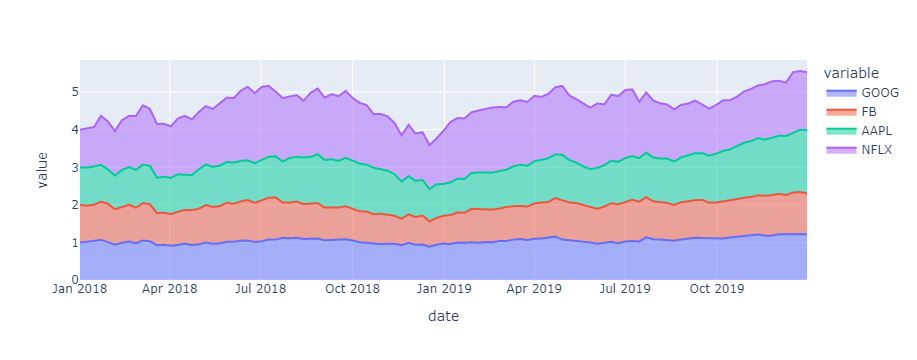

In [8]:
# Area plot
px.area(df, x='date', y=['GOOG', 'FB', 'AAPL', 'NFLX'])

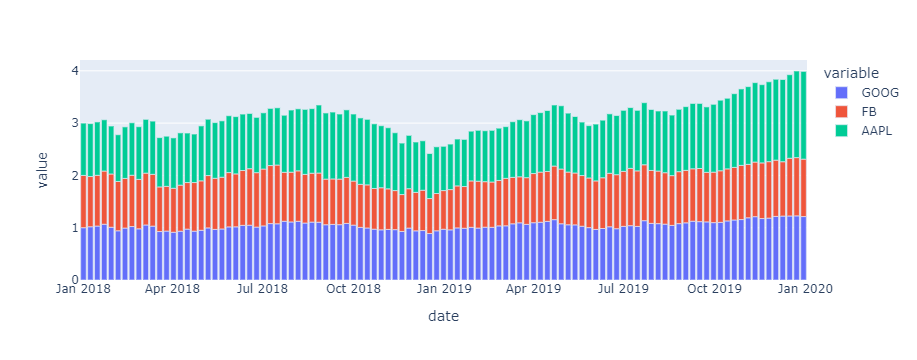

In [58]:
# bar plot
px.bar(df, x='date', y=['GOOG', 'FB', 'AAPL'])

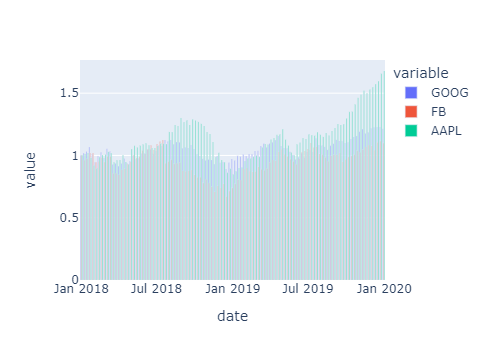

In [60]:
# To make bars beside not stacked
px.bar(df, x='date', y=['GOOG', 'FB', 'AAPL'], barmode='group')

---
# Use another dataset:

In [81]:
df = px.data.tips()
df.sample(5)

total_bill   tip     sex smoker   day    time  size
224       13.42  1.58    Male    Yes   Fri   Lunch     2
39        31.27  5.00    Male     No   Sat  Dinner     3
89        21.16  3.00    Male     No  Thur   Lunch     2
41        17.46  2.54    Male     No   Sun  Dinner     2
111        7.25  1.00  Female     No   Sat  Dinner     1

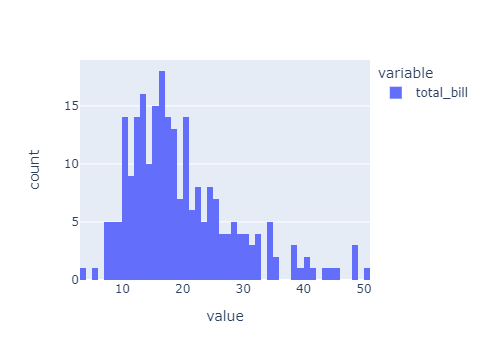

In [66]:
# px.histogram(df, x='total_bill')    <---- the same as below
px.histogram(df['total_bill'], nbins=50)

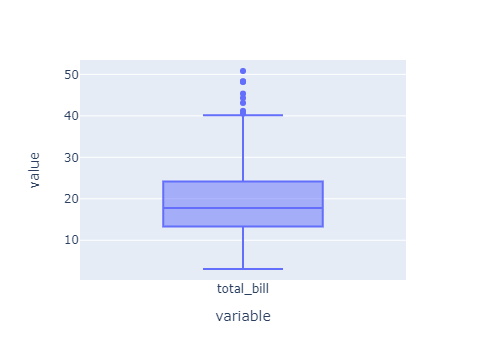

In [67]:
# Box plots
px.box(df['total_bill'])

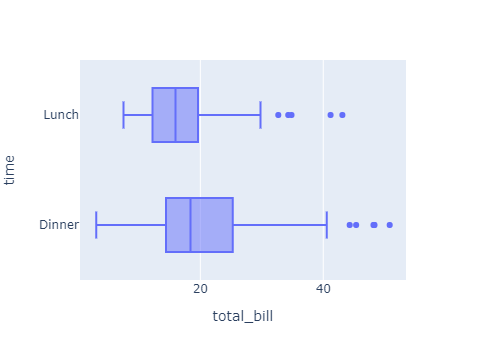

In [68]:
# To split by categories on the same column
px.box(df, x='total_bill', y='time')

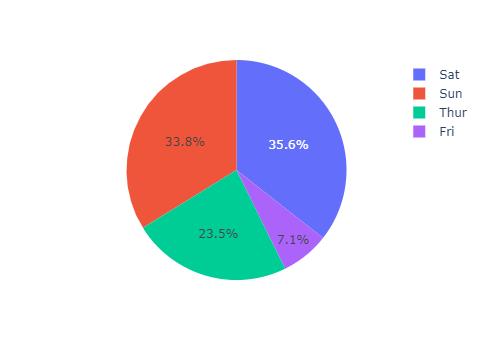

In [69]:
# Use pie plot to visualize percent of tips on each day 
px.pie(df, names='day', values='tip')